In [115]:
from reinforce import ReinforceAgent, Categorical2D
from visualisation import draw_qap, draw_assignment_graph
from qap import GraphAssignmentProblem, AssignmentGraph
from torch_geometric.utils import from_networkx
import taskgenerators
import torch
from evaluate import random_assignment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("testgraph.qap", "r") as f:
    qap = GraphAssignmentProblem.from_qaplib_string(f.read())

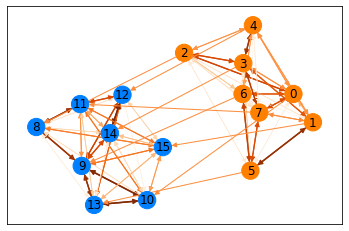

In [3]:
draw_qap(qap, random_assignment(qap))

In [107]:
agent = ReinforceAgent()
#agent.load_checkpoint("../runs/reinforce_transformer_random_graphs_1/checkpoint_end.pth")

In [108]:
data = agent.transform_initial_graph(qap.graph_source)
print(data)

Data(x=[8, 16], edge_index=[2, 56], edge_attr=[56, 16])


In [109]:
data.edge_attr

tensor([[0.0168, 0.0000, 0.1437, 0.0000, 0.0171, 0.1111, 0.0000, 0.1178, 0.0000,
         0.0000, 0.3693, 0.0000, 0.0000, 0.0000, 0.0579, 0.0000],
        [0.0000, 0.0009, 0.2984, 0.0000, 0.0000, 0.2023, 0.0000, 0.3116, 0.0000,
         0.0313, 0.3353, 0.0000, 0.0000, 0.0000, 0.0212, 0.0000],
        [0.0000, 0.0000, 0.1954, 0.0000, 0.0106, 0.1415, 0.0000, 0.1825, 0.0000,
         0.0000, 0.3580, 0.0000, 0.0000, 0.0000, 0.0457, 0.0000],
        [0.0000, 0.0000, 0.1837, 0.0000, 0.0121, 0.1346, 0.0000, 0.1678, 0.0000,
         0.0000, 0.3605, 0.0000, 0.0000, 0.0000, 0.0485, 0.0000],
        [0.1314, 0.0000, 0.0320, 0.0000, 0.0337, 0.0493, 0.0288, 0.0480, 0.0287,
         0.0000, 0.4338, 0.0000, 0.0000, 0.0000, 0.0546, 0.0000],
        [0.0000, 0.0000, 0.2716, 0.0000, 0.0011, 0.1864, 0.0000, 0.2780, 0.0000,
         0.0085, 0.3412, 0.0000, 0.0000, 0.0000, 0.0276, 0.0000],
        [0.0000, 0.0000, 0.2864, 0.0000, 0.0000, 0.1952, 0.0000, 0.2966, 0.0000,
         0.0211, 0.3379, 0.0000, 0.00

In [110]:
agent.solve_and_learn(qap)

(11.869139702797067, array([5., 3., 7., 2., 4., 6., 0., 1.]))

In [111]:
for param in agent.networks.parameters():
    print(torch.norm(param.grad))

tensor(0.0948)
tensor(0.1334)
tensor(0.5037)
tensor(0.2667)
tensor(0.0284)
tensor(0.0504)
tensor(0.0817)
tensor(0.1092)
tensor(0.0744)
tensor(0.2402)
tensor(0.0010)
tensor(5.0398e-10)
tensor(0.0006)
tensor(0.0015)
tensor(0.1403)
tensor(0.4119)
tensor(0.2199)
tensor(0.1446)
tensor(0.4119)
tensor(0.0012)
tensor(1.2017e-09)
tensor(0.0010)
tensor(0.0012)
tensor(0.3468)
tensor(0.4150)
tensor(0.2117)
tensor(0.3458)
tensor(0.4150)
tensor(0.3637)
tensor(0.2736)
tensor(0.1185)
tensor(0.0831)
tensor(0.0135)
tensor(0.0151)
tensor(0.0172)
tensor(0.0422)
tensor(0.0499)
tensor(0.0987)


In [112]:
data_a = agent.transform_initial_graph(qap.graph_source)
data_b = agent.transform_initial_graph(qap.graph_target)

In [113]:
embeddings_a = agent.messaging_net(data_a.x, data_a.edge_index, data_a.edge_attr)
embeddings_b = agent.messaging_net(data_b.x, data_b.edge_index, data_b.edge_attr)

In [114]:
probabilities = agent.compute_link_probabilities(embeddings_a, embeddings_b)
print(probabilities)

tensor([[0.4154, 0.4311, 0.4180, 0.4220, 0.4193, 0.4171, 0.4152, 0.4162],
        [0.4119, 0.4274, 0.4144, 0.4184, 0.4157, 0.4136, 0.4117, 0.4127],
        [0.4096, 0.4250, 0.4121, 0.4161, 0.4134, 0.4113, 0.4095, 0.4104],
        [0.4178, 0.4336, 0.4204, 0.4244, 0.4217, 0.4195, 0.4176, 0.4186],
        [0.4103, 0.4257, 0.4128, 0.4168, 0.4141, 0.4120, 0.4101, 0.4111],
        [0.4103, 0.4258, 0.4129, 0.4168, 0.4141, 0.4120, 0.4102, 0.4111],
        [0.4078, 0.4230, 0.4103, 0.4142, 0.4115, 0.4094, 0.4076, 0.4086],
        [0.4120, 0.4275, 0.4145, 0.4185, 0.4158, 0.4137, 0.4118, 0.4128]],
       grad_fn=<MmBackward0>)


In [117]:
policy = Categorical2D(logits=probabilities)

In [118]:
policy.distribution.probs

tensor([0.0156, 0.0159, 0.0157, 0.0157, 0.0157, 0.0156, 0.0156, 0.0156, 0.0156,
        0.0158, 0.0156, 0.0157, 0.0156, 0.0156, 0.0156, 0.0156, 0.0155, 0.0158,
        0.0156, 0.0156, 0.0156, 0.0156, 0.0155, 0.0155, 0.0157, 0.0159, 0.0157,
        0.0158, 0.0157, 0.0157, 0.0157, 0.0157, 0.0155, 0.0158, 0.0156, 0.0156,
        0.0156, 0.0156, 0.0155, 0.0156, 0.0155, 0.0158, 0.0156, 0.0156, 0.0156,
        0.0156, 0.0155, 0.0156, 0.0155, 0.0157, 0.0155, 0.0156, 0.0156, 0.0155,
        0.0155, 0.0155, 0.0156, 0.0158, 0.0156, 0.0157, 0.0156, 0.0156, 0.0156,
        0.0156], grad_fn=<SoftmaxBackward0>)

In [74]:
embeddings_a

tensor([[ 0.0244,  0.0289, -0.0395,  0.0134,  0.0293,  0.0557, -0.0919, -0.1007,
          0.0340, -0.0435, -0.0588, -0.0144,  0.0276, -0.0595, -0.1022,  0.0063],
        [ 0.0244,  0.0289, -0.0395,  0.0134,  0.0293,  0.0556, -0.0919, -0.1008,
          0.0339, -0.0435, -0.0587, -0.0145,  0.0276, -0.0595, -0.1023,  0.0063],
        [ 0.0244,  0.0289, -0.0395,  0.0135,  0.0293,  0.0556, -0.0919, -0.1008,
          0.0339, -0.0434, -0.0586, -0.0145,  0.0276, -0.0595, -0.1023,  0.0062],
        [ 0.0244,  0.0289, -0.0395,  0.0134,  0.0293,  0.0557, -0.0919, -0.1007,
          0.0339, -0.0435, -0.0587, -0.0144,  0.0276, -0.0595, -0.1023,  0.0064],
        [ 0.0244,  0.0289, -0.0395,  0.0134,  0.0293,  0.0556, -0.0919, -0.1008,
          0.0339, -0.0434, -0.0587, -0.0145,  0.0275, -0.0596, -0.1023,  0.0063],
        [ 0.0245,  0.0289, -0.0394,  0.0134,  0.0292,  0.0555, -0.0920, -0.1009,
          0.0339, -0.0434, -0.0586, -0.0146,  0.0275, -0.0595, -0.1023,  0.0063],
        [ 0.0245,  0.0

In [75]:
embeddings_b

tensor([[ 0.0245,  0.0289, -0.0395,  0.0135,  0.0293,  0.0555, -0.0920, -0.1009,
          0.0338, -0.0434, -0.0585, -0.0146,  0.0276, -0.0596, -0.1023,  0.0062],
        [ 0.0244,  0.0289, -0.0395,  0.0135,  0.0293,  0.0557, -0.0919, -0.1007,
          0.0339, -0.0435, -0.0588, -0.0143,  0.0276, -0.0596, -0.1022,  0.0064],
        [ 0.0245,  0.0289, -0.0395,  0.0135,  0.0293,  0.0556, -0.0920, -0.1008,
          0.0339, -0.0434, -0.0586, -0.0145,  0.0276, -0.0596, -0.1023,  0.0062],
        [ 0.0244,  0.0289, -0.0395,  0.0135,  0.0294,  0.0557, -0.0919, -0.1006,
          0.0340, -0.0435, -0.0587, -0.0143,  0.0276, -0.0596, -0.1022,  0.0063],
        [ 0.0245,  0.0289, -0.0395,  0.0135,  0.0293,  0.0556, -0.0920, -0.1008,
          0.0339, -0.0434, -0.0586, -0.0145,  0.0276, -0.0596, -0.1023,  0.0062],
        [ 0.0245,  0.0289, -0.0395,  0.0135,  0.0293,  0.0555, -0.0920, -0.1009,
          0.0338, -0.0434, -0.0585, -0.0146,  0.0276, -0.0596, -0.1023,  0.0062],
        [ 0.0244,  0.0

<IPython.core.display.Javascript object>


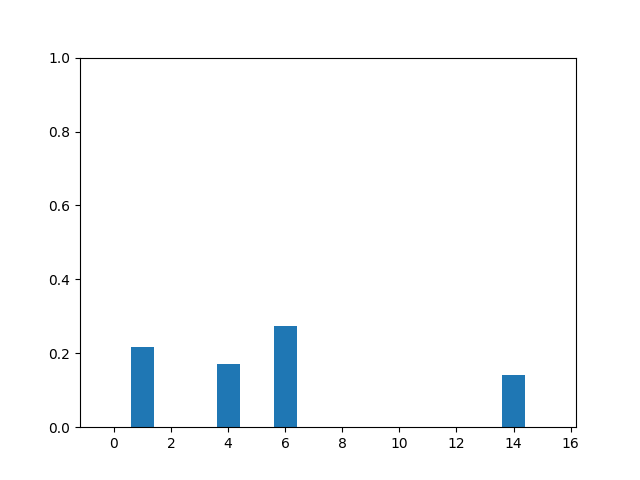

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), FloatSlider(value=0.5, description='y'…

In [76]:
%matplotlib notebook
from ipywidgets import interact

fig,ax = plt.subplots()

@interact(x=(0.,1.), y=(0.,1.))
def show_edge_embedding(x, y):
    with torch.no_grad():
        embedding = agent.edge_embedding_net(torch.tensor([x,y]))
        ax.clear()
        ax.set_ylim(0,1)
        ax.bar(range(len(embedding)), embedding)
        
fig.show()

In [93]:
def print_parameter_gradients(x):
    agent.optimizer.zero_grad()
    x.backward(retain_graph=True)
    for param in agent.networks.parameters():
        print(torch.norm(param.grad))

In [84]:
print_parameter_gradients(embeddings_a[3,1])

tensor(0.0004)
tensor(0.0009)
tensor(0.0046)
tensor(0.0042)
tensor(0.0007)
tensor(0.0028)
tensor(0.0030)
tensor(0.0117)
tensor(0.0118)
tensor(0.0393)
tensor(1.2245e-09)
tensor(1.9540e-13)
tensor(6.7051e-08)
tensor(2.8871e-07)
tensor(0.0140)
tensor(0.0602)
tensor(0.0156)
tensor(0.0140)
tensor(0.0602)
tensor(1.1702e-08)
tensor(1.7053e-13)
tensor(5.7180e-08)
tensor(1.3148e-07)
tensor(0.0130)
tensor(0.0299)
tensor(0.0078)
tensor(0.0130)
tensor(0.0299)
tensor(0.0790)
tensor(0.1816)
tensor(0.2869)
tensor(1.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
